In [1]:
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = [10, 10]

In [2]:
from preprocessing import *

fpath_mapping_df = clean_filepath_filename_mapping_csv('Breast-Cancer-MRI-filepath_filename-mapping.csv')
print(fpath_mapping_df)

c:\Users\hari\_workarea_\surya\breast-fgt\3D-Breast-FGT-and-Blood-Vessel-Segmentation\preprocessing.py:35: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  fpath_mapping_df = pd.read_csv(


            subject_id                         precontrast_dir
640     Breast_MRI_001               3.000000-ax dyn pre-93877
1268    Breast_MRI_002              600.000000-ax 3d dyn-25442
2094    Breast_MRI_003           500.000000-ax 3d dyn MP-06358
2806    Breast_MRI_004              500.000000-ax 3d dyn-57340
3540    Breast_MRI_005               4.000000-ax dyn pre-51993
...                ...                                     ...
769379  Breast_MRI_918  400.000000-Ax Vibrant MultiPhase-08096
770531  Breast_MRI_919  500.000000-Ax Vibrant MultiPhase-68694
771395  Breast_MRI_920               4.000000-ax dyn pre-84153
772133  Breast_MRI_921             500.000000-ax dynamic-75659
772892  Breast_MRI_922             500.000000-ax dynamic-42671

[922 rows x 2 columns]


In [8]:
sample_subject = 'Breast_MRI_006'

image_array, dcm_data, nrrd_breast_data, nrrd_dv_data = read_precontrast_mri_and_segmentation(
    sample_subject,
    'Duke-Breast-Cancer-MRI',
    fpath_mapping_df,
    'train_annotations'
)

image_array = zscore_image(normalize_image(image_array))

# Save data
# Added code
np.save('./in_image/Breast_MRI_006.npy', image_array)
np.save('./in_dicom/Breast_MRI_006.npy', dcm_data)
np.save('./in/Breast_MRI_006.npy', nrrd_breast_data)
np.save('./in_mask/Breast_MRI_006.npy', nrrd_dv_data)


#image_array, dcm_data, nrrd_breast_data, nrrd_dv_data

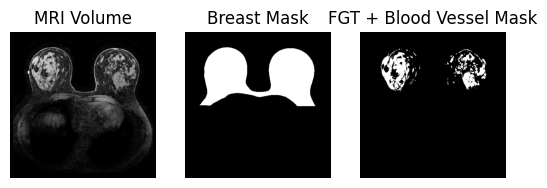

In [4]:
plt.subplot(1, 3, 1)
plt.title('MRI Volume')
plt.imshow(image_array[:, :, 50], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Breast Mask')
plt.imshow(nrrd_breast_data[:, :, 50], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('FGT + Blood Vessel Mask')
plt.imshow(nrrd_dv_data[:, :, 50], cmap='gray')
plt.axis('off')

plt.show()


Run prediction code for the breast mask
```
python predict.py --target-tissue breast --image ./in --save-masks-dir ./out --model-save-path ./trained_models/breast_model.pth
```


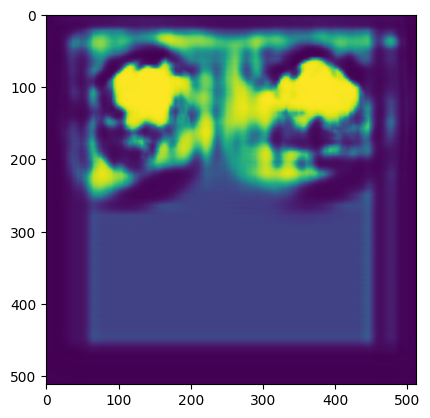

In [18]:
#True mask shape
#Pred mask shape
predict_mask = np.load('./out/Breast_MRI_006.npy')

plt.imshow(predict_mask[:, :, 50])
plt.show()


Run prediction code for the fgt
```
python predict.py --target-tissue dv --image ./in_image --input-mask ./in_mask --save-masks-dir ./out_fgt --model-save-path .\trained_models\dv_model.pth
```

TypeError: Invalid shape (3, 512, 148) for image data

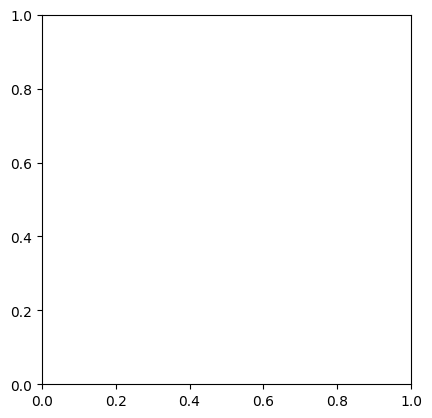

In [11]:
#FGT
predict_mask = np.load('./out_fgt/Breast_MRI_006.npy')

plt.imshow(predict_mask[:, :, 50])
plt.show()